In [73]:
import numpy as np
import cv2

img = cv2.imread(r"../images/img.png")
px = img[66, 66]
print(px)  # [221 232 236] BGR
blue = img[66, 66, 0]  # 221
green = img[66, 66, 1]  # 232
print(blue, green)

for i in range(0, 66):
    img[i, i] = [0, 0, 0]  # 把这些点像素值改为0，就是黑色
cv2.imshow("img", img)  # 显示出来就会在左上角有一条对角(残缺)的黑色线
cv2.waitKey(0)
cv2.destroyAllWindows()

[221 232 236]
221 232


In [74]:
# RED
print(img.item(0, 0, 2))
# 修改
for i in range(0, 66):
    img.itemset((i, i, 2), 255)

cv2.imshow("img", img)  # 显示出来就会在左上角有一条对角(残缺)的红色线
# 因为改了像素值，所以前面修改的黑色对角线就变成红色的了
cv2.waitKey(0)
cv2.destroyAllWindows()

0


In [75]:
img.shape  # 它返回行，列和通道数的元组（如果图像是彩色的）

(750, 888, 3)

In [76]:
img.size  # 像素总数

1998000

In [77]:
img.dtype  # 图像数据类型

dtype('uint8')

有时候，你不得不处理一些特定区域的图像。
对于图像中的眼睛检测，首先对整个图像进行人脸检测。
在获取人脸图像时，我们只选择人脸区域，搜索其中的眼睛，而不是搜索整个图像。它提高了准确性(因为眼睛总是在面部上:D )和性能(因为我们搜索的区域很小)。

In [78]:
#ROI 图像感兴趣区域
roi = img[0:65, 0:65]
print(roi.shape)  # (65, 128, 3)
img[200:265, 200:265] = roi  # 注意替换的shape 265-200=65

cv2.imshow("roi", roi)
cv2.waitKey(0)

cv2.imshow("img", img)
cv2.waitKey(0)

cv2.destroyAllWindows()

(65, 65, 3)


cv.copyMakeBorder() 为图像踢设置边框（填充）

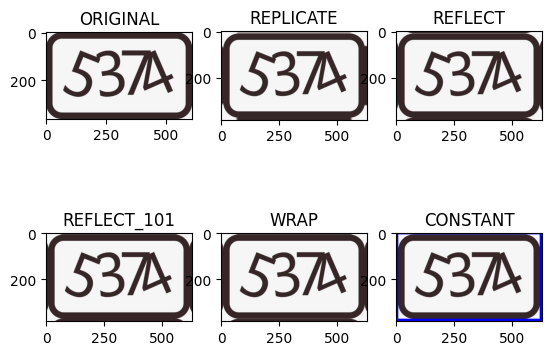

In [79]:
import cv2 as cv

from matplotlib import pyplot as plt

#BGR
BLUE = [255, 0, 0]
GREEN = [0, 255, 0]
RED = [0, 0, 255]
img1 = cv.imread('../images/captcha.png')
# 10,10,10,10 top，bottom，left，right 边界宽度（以相应方向上的像素数为单位）
replicate = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_WRAP)

constant = cv.copyMakeBorder(img1, 10, 10, 10, 10, cv.BORDER_CONSTANT, value=RED)

# RGB
plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.show()